# Studio 5 -- Vector-Matrix Operations and Decompositions in NumPy
## Put your group number and the full names of you and your groupmates here:
### Group: #9
- 1 -- Hannah James
- 2 -- Victorya Hunanyan
- 3 -- Victor Nguyen



In [3]:
## run this cell first to import all the necessary tools
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

# Problem 1

## Vectors, Matricies, and Systems of Equations in NumPy/SciPy

As with most other things in studio, we'll be using NumPy and SciPy for our vector and matrix operations.  The basic way of defining a vector in NumPy is just as a 1D array, while a matrix is just a 2D array (that is, a NumPy array with two indicies).

We will use the SciPy `linalg` routine, since it is more complete (see [here](https://docs.scipy.org/doc/scipy/tutorial/linalg.html) for a more complete description of the differences).  The complete list of `linalg` routines is available [here](https://docs.scipy.org/doc/scipy/reference/linalg.html).  As you can see, it's quite extensive

For these problems, we'll use the following 8x8 matrix and 8x1 vector:

$$\mathbf{A} = \begin{bmatrix}  -8 & 0 & -3 & -6 & 0 & -3 & -5 & -4 & -8 & -9\\  -3 & -8 & -2 & -4 & -5 & -1 & 2 & 7 & 6 & 3\\  7 & 8 & 1 & 9 & 8 & 1 & 9 & 6 & -6 & 5\\  1 & -9 & 8 & 6 & 7 & -4 & -9 & -4 & -3 & -8\\  5 & -3 & -9 & -8 & -2 & -6 & 3 & -8 & 1 & -4\\  0 & -6 & -4 & -7 & -8 & -7 & -4 & 1 & -3 & 1\\  0 & 0 & 9 & -5 & -7 & 0 & -3 & 2 & -7 & 7\\  -2 & -4 & 8 & -9 & -9 & 0 & 2 & -4 & 4 & 9\\  7 & 7 & -1 & -2 & 7 & -4 & -3 & -1 & 1 & -2\\  -1 & -4 & -5 & -3 & -1 & -5 & 0 & -5 & -3 & 1\\\end{bmatrix},~~~~\vec{b}=\begin{bmatrix} -3\\4\\-4\\-4\\-3\\2\\-8\\6\\5\\-1\\\end{bmatrix}$$

I've written these below

In [6]:
A = np.array([[-8,  0, -3, -6,  0, -3, -5, -4, -8, -9],
       [-3, -8, -2, -4, -5, -1,  2,  7,  6,  3],
       [ 7,  8,  1,  9,  8,  1,  9,  6, -6,  5],
       [ 1, -9,  8,  6,  7, -4, -9, -4, -3, -8],
       [ 5, -3, -9, -8, -2, -6,  3, -8,  1, -4],
       [ 0, -6, -4, -7, -8, -7, -4,  1, -3,  1],
       [ 0,  0,  9, -5, -7,  0, -3,  2, -7,  7],
       [-2, -4,  8, -9, -9,  0,  2, -4,  4,  9],
       [ 7,  7, -1, -2,  7, -4, -3, -1,  1, -2],
       [-1, -4, -5, -3, -1, -5,  0, -5, -3,  1]])

b = np.array([-3,  4, -4, -4, -3,  2, -8,  6,  5, -1])

**NOTE** Confusingly, both NumPy and SciPy have a version of the `linalg` package, and they are not the same.  We will only use the SciPy one here (for the most part, it contains everything the NumPy one does, as well as several additional functions).  Also, you will see some of the older documentation contrasts between a NumPy array and and NumPy `matrix` type.  **Do not use the NumPy matrix type**.  It is considered outdated and no longer used; 2D NumPy arrays are the way to go.

## Part A)

Let's warm up with some simple vector-matrix operations.  As you can see from the [https://docs.scipy.org/doc/scipy/reference/linalg.html](list of functions), `linalg` had just about everything we could need.
 It also has two useful shortcuts:
 
- `@` -- is a shortcut for basically all matrix multiplication (used the same way `*` is).  It does inner products, matrix-vector products, matrix-matrix products, etc.   
- `.T` -- Returns the transpose of a matrix.  This is a method to the NumPy array itself, so if I call `A.T`, it returns a copy of `A` with the rows and columns swapped 

First, compute:

- $\vec{b}\cdot\vec{b}$
- $\mathbf{A}\cdot\vec{b}$
- $(\mathbf{A}^3)^T$ 

using these built-in functions.  

In [19]:
## Put answer here
multiply1 = b@b
print("b*b:", multiply1)
multiply2 = A@b
print("A*b:", multiply2)
multiply3 = (A@A@A).T
print("(A^3)^T:", multiply3)

b*b: 196
A*b: [  39   67 -122  -83  -28   52   -1   -8   15  -34]
(A^3)^T: [[  434   -26   455   -36   -52   912  -447 -1791  -130   254]
 [-1957   -64  5131 -3517 -1407 -2075 -2922 -5052   980 -1185]
 [ 1754 -1396    25  -272  -518   134  1881   537  -104   -93]
 [-2516    64  4483 -1567  -711  -868 -1693 -3483  -798  -262]
 [-1495   145  2428   -87 -1497 -1035 -2361 -3536  -834  -333]
 [-2188  -603  3489 -2052    57 -1536 -1248 -1961   907  -580]
 [-2452   957  2516 -2262   192  -564 -1013  -897  -308  -696]
 [ -564  1171  1188 -1538  1338   827  -515  -763   199   231]
 [ -624  -633  -490  -610  2210   290  -888  -156  1295   527]
 [  650   605  1221 -3886   695   939  1739   810   116  -422]]


## Part B)

Of course, all of these commands also work with `*` and `**` (the regular NumPy multiplication and exponential symbols).  Try them below for $\mathbf{A}\cdot\vec{b}$ and $(\mathbf{A}^3)^T$ .  Does the shape of $\mathbf{A}\cdot\vec{b}$ make as a matrix-vector operation?  What is actually being computing here?

In [29]:
## Put answer here
numpymultiply1 = A*b
print("A*b:", numpymultiply1)
numpymultiply2 = (A**3).T
print("(A^3)^T:", numpymultiply2)

A*b: [[ 24   0  12  24   0  -6  40 -24 -40   9]
 [  9 -32   8  16  15  -2 -16  42  30  -3]
 [-21  32  -4 -36 -24   2 -72  36 -30  -5]
 [ -3 -36 -32 -24 -21  -8  72 -24 -15   8]
 [-15 -12  36  32   6 -12 -24 -48   5   4]
 [  0 -24  16  28  24 -14  32   6 -15  -1]
 [  0   0 -36  20  21   0  24  12 -35  -7]
 [  6 -16 -32  36  27   0 -16 -24  20  -9]
 [-21  28   4   8 -21  -8  24  -6   5   2]
 [  3 -16  20  12   3 -10   0 -30 -15  -1]]
(A^3)^T: [[-512  -27  343    1  125    0    0   -8  343   -1]
 [   0 -512  512 -729  -27 -216    0  -64  343  -64]
 [ -27   -8    1  512 -729  -64  729  512   -1 -125]
 [-216  -64  729  216 -512 -343 -125 -729   -8  -27]
 [   0 -125  512  343   -8 -512 -343 -729  343   -1]
 [ -27   -1    1  -64 -216 -343    0    0  -64 -125]
 [-125    8  729 -729   27  -64  -27    8  -27    0]
 [ -64  343  216  -64 -512    1    8  -64   -1 -125]
 [-512  216 -216  -27    1  -27 -343   64    1  -27]
 [-729   27  125 -512  -64    1  343  729   -8    1]]


###The shape is different for the for A*b for part(a) and part(b) since in part(a), the dot product of the matrix is being calculated. Therefore, we receive scalar results. Part(b) only does the multiplication aspect, but doesn't add them as done in a dot product.

## Part C)

One of the main goals of linear algebra is solving systems of equations, i.e., solving for $\vec{x}$ in 

$$\mathbf{A}\cdot\vec{x}=\vec{b}$$

Use the `linalg` package to compute the inverse of $\mathbf{A}$.  Check that $\mathbf{A}^{-1}\mathbf{A}=\mathbf{I}$, then use $\mathbf{A}^{-1}$ and $\vec{b}$ to compute $\vec{x}$.

**Hint:** to eliminate floating point numbers that are close to zero (i.e. the 1e-16 stuff) try adding `.round(12)` to the end of your identity matrix 

In [56]:
## Put answer here
inverse = np.linalg.inv(A)
I = inverse @ A
print("identity matrix:", I.round(12))
x = inverse @ b
print("x =", x)

identity matrix: [[ 1.  0.  0. -0.  0.  0.  0. -0. -0.  0.]
 [ 0.  1. -0. -0. -0. -0.  0. -0.  0.  0.]
 [ 0.  0.  1.  0.  0. -0.  0. -0.  0. -0.]
 [-0. -0. -0.  1. -0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0. -0.  1.  0. -0.  0. -0. -0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -0.  0.]
 [ 0. -0. -0. -0. -0. -0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -0.  0.  0. -0.  0. -0.  1. -0.]
 [-0.  0.  0. -0.  0.  0. -0.  0. -0.  1.]]
x = [-1.41411334  1.63117822  0.76950789  1.26254513 -1.03441597 -3.28151114
  0.4787199   0.01134798  1.78827917 -0.2746199 ]


# Problem 2

## Recursive Determinants

As we discussed in lecture, one easy way to compute the determinant from the permutation-based definition is to just expand along the top row, and recursively compute the determinant of the minor matrix from every element (see page 14 of the Lecture 15 notes).  

I have provided below the template of an algorithm for computing the determinant.  For an nxn matrix, it takes the 2D NumPy array matrix and n as inputs, and computes the determinant **recursively**.

## Part a)

Fill in the two missing lines of code that calculate the determinant in the case of a 2x2 matrix, and in the case where you need to recursively calculate the determinant.


In [100]:
def recursive_determinant(matrix,n):
    '''
    Recursively compute the determinant of an nxn matrix
        
    PARAMETERS:
        matrix - nxn 2D NumPy array
        n      - size of one axis of the matrix
    
    RETURN VALUE:
        Determinant
    '''

    det = 0
    
    if n == 2:
        det = matrix[0,0] * matrix [1,1] - matrix[0,1] * matrix[1,0]
    else:
        for i in range(n):
            
            ## This line deletes the top row from the matrix
            submatrix = np.delete(matrix,(0),axis=0)
            ## This line deletes the ith column from the matrix.
            submatrix = np.delete(submatrix,(i),axis=1)
            ## submatrix is then just matrix without the 0th row and the ith column
            
            det += ((-1) ** i) * matrix[0,i] * recursive_determinant(submatrix, n-1)
            
    return det
            

## Part B)

Create an arbitrary 3x3 matrix, and test your recursive function on it. Does it give you the correct determinant?

In [127]:
#PUT CODE HERE
example = np.array([[1,1,5],[2,4,2],[6,3,3]])
my_recursive = recursive_determinant(example, 3)
print("recursive function:", my_recursive)

recursive = np.linalg.det(example)
print("linalg.det:",recursive)

recursive function: -78
linalg.det: -78.0


## Part C)

Run your recursive function on the previous matrix $\mathbf{A}$.  Compare that to the value you get from the `linalg.det` function.  Do they agree?

In [126]:
## PUT CODE HERE
my_recursive = recursive_determinant(A, 10)
print("recursive function:", my_recursive)
recursive2 = np.linalg.det(A)
print("linalg.det:",recursive2)

recursive function: -12882716025
linalg.det: -12882716024.999979


# Problem 3

## Rotation Matricies

In 2D, I can rotate a vector by an angle $\theta$ by hitting it with a matrix

$$\mathbf{R} = \begin{pmatrix}\cos\theta & -\sin\theta \\\sin\theta & \cos\theta \end{pmatrix}$$

## Part A)

With $\theta=42^{\circ}$ and $\vec{x}=\begin{pmatrix}1\\0\end{pmatrix}$, define both $\mathbf{R}$ and $\vec{x}$ as NumPy arrays, compute $$\mathbf{R}\vec{x}$$

Plot as arrows (using the [arrow-style](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html) plot in matplotlib) both $\vec{x}$ and $\mathbf{R}\vec{x}$ (in blue and red respectively).  Does this give you the expected behaivor?

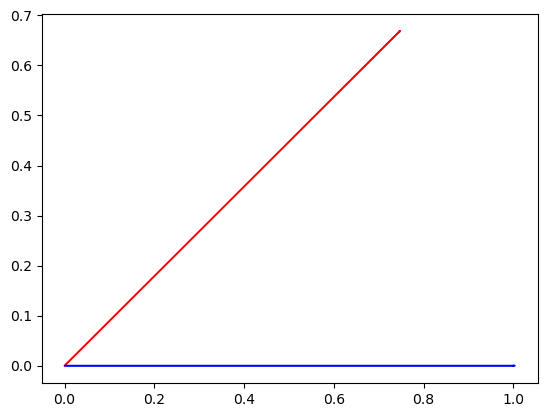

In [192]:
## PUT ANSWER HERE
R = np.array([[np.cos(0.73), -np.sin(0.73)], [np.sin(0.73), np.cos(0.73)]])
x = np.array([1,0])
y = R@x
plt.arrow(0,0, y[0], y[1], color = "r")
plt.arrow(0,0, x[0],x[1], color = "b")
plt.show()
#Yes, this graph gives us the expected behavior!

## Part B)

Do the same thing, but this time use the inverse of $\mathbf{R}$ as your matrix (i.e. plot $\vec{x}$ and $\mathbf{R}^{-1}\vec{x}$).  What angle is this rotating by, and does this make sense? 

[[ 0.7451744   0.66686964]
 [-0.66686964  0.7451744 ]]


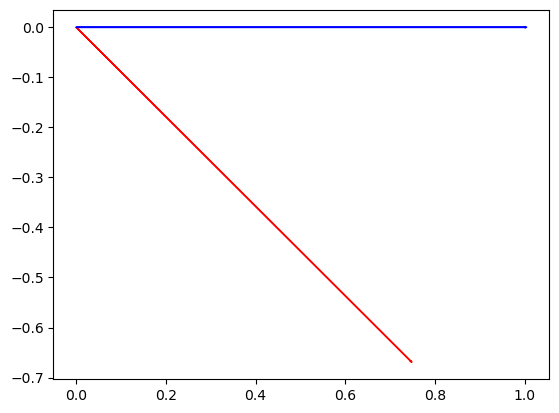

In [195]:
## PUT ANSWER HERE
inverseR = np.linalg.inv(R)
print(inverseR)
y2 = inverseR @ x
plt.arrow(0,0, y2[0], y2[1], color = "r")
plt.arrow(0,0, x[0], x[1], color = "b")
#This function is rotating by the angle of 0, since it simply offsets what we've already done.